In [8]:
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
%matplotlib inline

### O quanto você precisa tentar para pegar um shiny?


Quem joga pokemon sabe o quão dificil é pegar um pokemon shiny. As chances normais de conseguir um em um encontro aleatório nos ultimos jogos está proximo de 1/4096, e a maneira mais comum de conseguir seu shinizinho é ir tentando varios encontros aleatorios. A medida que a gente vai tentando e o shiny não aparece só sobra a frustração e o cansaço, e dai que me veio a ideia de testar quais eram as chances de encontrar meu shiny apos x encontros. 

Que é exatamente o que acontece aqui nesse codigo. Vamos usar python para aplicar a chamada "estatistica de hacker". 

#### As funções

Para a nossa simulação vamos usar duas funções: uma que calcula a razão entre dois fatoriais, e outra para retornar a probabilidade de encontrar "a" shinies após "t" tentativas.
Pode soa estranho fazer uma função apenas para retornar a razão entre dois fatoriais mas tem um motivo muito simples: fatoriais são numeros grandes, o que fazem as operações com os fatoriais por inteiro ficarem desnecessariamente demoradas. Por exemplo, o fatorial de 6000 tem 20066 digitos, enquanto o fatorial de 5999 tem 20062, a razão entre esses dois numeros é muito dificil de calcular pro computador, sendo que o numero é muito facil de calcular manualmente: 6000.

In [4]:
def raz(n,d):
    if n==d or n<d:
        return 1
    else:
        return n*raz(n-1,d)
    
def p(a,t,prob=1/4096):
    return prob**a*(1-prob)**(t-a)*raz(t,t-a)/math.factorial(a)

Um comentario sobre essa função da razão entre os fatoriais: ela é recursiva. O que significa que ela retorna ela mesma até um ponto final, no nosso caso, quando os numeros batem. Por exemplo, se colocarmos os numeros 10 e 7, ela vai fazer 10 vezes a razão do fatorial de 9 com 7, que vai fazer  9 vezes razão entre o fatorial de 8 com 7, que vai fazer o 8 vezes razão entre o fatorial de 7 com 7, que é 1. E no final teremos $10 \times 9 \times 8$, que é exatamente a razão entre o fatorial de 10 e o fatorial de 7. Lindo né?

#### O algoritmo

Aqui vamos aplicar as funções criadas. E é simples, fazer uma lista com as quantidades de tentativas (no nosso caso de 1 a 6000) e a quantidade maxima de shinies que queremos encontrar para se ter uma aproximação boa (o ideal seria o mesmo numero de tentativas, mas haja computador para fazer esse calculo para 6000! 10 é um numero que aproxima bem quando falamos de uma probabilidade 1/4096). Em seguida calculamos as probabilidaes para cada quantidade de tentativas, e para cada quantidade de maximo de shinies. Isso é simples de fazer, 2 "for"s e ta pronto. Depois é só plotar com a famosa matplotlib.

In [9]:
tentativas=6000
nshinies=10
X=np.linspace(1, tentativas, tentativas)
Ptotal=np.zeros(tentativas)
P=[]
for j in np.linspace(1,nshinies, nshinies):
    Pt=[]
    k= 0
    for i in X:
        Pt.append(p(j,i))
        Ptotal[k]+=p(j,i)
        k+=1
    P.append(Pt)

Text(0, 0.5, 'probabilidade de ter encontrado pelo menos um shiny (%)')

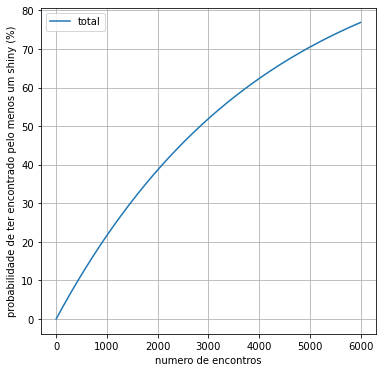

In [14]:
fig, ax = plt.subplots(figsize=[6,6])
plt.plot(X,100*Ptotal, label='total')
plt.legend()
plt.grid()
plt.xlabel('numero de encontros')
plt.ylabel('probabilidade de ter encontrado pelo menos um shiny (%)')

Aqui vemos que pra se ter pra ter 50% de chance de se ter um shiny temos que tentar proximos 2800 encontros, então paciencia jovem pokemaniaco :).